##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [62]:
#%pip install pandas 
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [63]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import datetime
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Read data
data = pd.read_csv('catA_train.csv')
data

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,Subsidiary,...,6615.0,2.949122e+06,2.943975e+09,NaN,2020-12-31T05:00:00Z,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",NaN,Independent,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,6726.0,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,Subsidiary,...,NaN,2.289731e+08,4.114318e+08,Exports,2021-12-31T05:00:00Z,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0


In [66]:
data.corr()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
LATITUDE,1.000000,-0.048014,-0.086447,-0.086741,-0.023920,NaN,0.001218,0.004256,-0.010028,0.004602,-0.010685,-0.004247,-0.039308
LONGITUDE,-0.048014,1.000000,0.027467,0.027591,-0.008341,NaN,-0.006147,0.013906,0.003871,-0.006884,0.008687,0.001314,0.009406
SIC Code,-0.086447,0.027467,1.000000,0.999772,0.195683,NaN,-0.050296,-0.022058,0.001587,-0.011493,-0.014743,0.016096,0.087371
8-Digit SIC Code,-0.086741,0.027591,0.999772,1.000000,0.195632,NaN,-0.051988,-0.022178,0.001607,-0.011480,-0.014717,0.015921,0.087409
Year Found,-0.023920,-0.008341,0.195683,0.195632,1.000000,NaN,-0.060472,-0.046540,-0.025981,0.014523,-0.021591,0.076785,0.111644
Square Footage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employees (Single Site),0.001218,-0.006147,-0.050296,-0.051988,-0.060472,NaN,1.000000,0.139117,0.008463,0.003556,0.001529,-0.016421,0.004828
Employees (Domestic Ultimate Total),0.004256,0.013906,-0.022058,-0.022178,-0.046540,NaN,0.139117,1.000000,0.020404,0.016907,0.024359,-0.060550,-0.044336
Employees (Global Ultimate Total),-0.010028,0.003871,0.001587,0.001607,-0.025981,NaN,0.008463,0.020404,1.000000,-0.003966,0.663478,0.076545,-0.087329
Sales (Domestic Ultimate Total USD),0.004602,-0.006884,-0.011493,-0.011480,0.014523,NaN,0.003556,0.016907,-0.003966,1.000000,0.098110,-0.054561,-0.039314


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [68]:
# Check the number of missing values in each column
data.isnull().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [69]:
# Drop rows with missing values in LONGITUDE or LATITUDE
data.dropna(subset=['LATITUDE','LONGITUDE'], inplace=True)
data

# Drop inactive companies
active_statuses = ['Active']
mask = data['Company Status (Active/Inactive)'].isin(active_statuses)
data = data[mask]
data

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,Subsidiary,...,6615.0,2.949122e+06,2.943975e+09,NaN,2020-12-31T05:00:00Z,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",NaN,Independent,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,6726.0,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,Subsidiary,...,NaN,2.289731e+08,4.114318e+08,Exports,2021-12-31T05:00:00Z,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0


In [70]:
# Encode data
le=LabelEncoder()
data['AccountID']=le.fit_transform(data['AccountID'])
data['Company']=le.fit_transform(data['Company'])
data['Industry']=le.fit_transform(data['Industry'])
data['8-Digit SIC Description']=le.fit_transform(data['8-Digit SIC Description'])
data['Entity Type']=le.fit_transform(data['Entity Type'])
data['Parent Company']=le.fit_transform(data['Parent Company'])
data['Parent Country']=le.fit_transform(data['Parent Country'])
data['Ownership Type']=le.fit_transform(data['Ownership Type'])
data['Company Description']=le.fit_transform(data['Company Description'])
data['Company Status (Active/Inactive)']=le.fit_transform(data['Company Status (Active/Inactive)'])
data['Import/Export Status']=le.fit_transform(data['Import/Export Status'])
data['Fiscal Year End']=le.fit_transform(data['Fiscal Year End'])
data['Global Ultimate Company']=le.fit_transform(data['Global Ultimate Company'])
data['Global Ultimate Country']=le.fit_transform(data['Global Ultimate Country'])
data['Domestic Ultimate Company']=le.fit_transform(data['Domestic Ultimate Company'])
data

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,11482,9037,7361.0,157,73610000.0,649,2020.0,3,...,NaN,2.209224e+06,4.637871e+06,3,114,4127,70,4844,0.0,0.0
1,1.291294,103.827476,21363,17383,4449.0,565,44490000.0,2136,2015.0,3,...,100.0,7.093536e+09,7.093536e+09,3,114,9360,60,15545,0.0,0.0
2,1.300144,103.857517,14440,32,6719.0,373,67190000.0,935,1993.0,3,...,4.0,1.026308e+06,1.026308e+06,3,114,7532,24,13,1.0,0.0
3,1.300785,103.791263,13244,17426,6719.0,373,67190000.0,935,2006.0,3,...,100.0,7.339898e+10,7.339898e+10,3,114,13548,60,15045,0.0,0.0
4,1.298759,103.859430,951,1997,6719.0,373,67190000.0,935,2006.0,2,...,4.0,4.322130e+05,4.322130e+05,1,114,834,60,1076,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,14319,7042,6719.0,373,67199901.0,1050,2009.0,3,...,6615.0,2.949122e+06,2.943975e+09,3,53,14057,14,3793,1.0,0.0
29178,1.319605,103.898298,16752,18545,6719.0,373,67190000.0,935,NaN,1,...,4.0,1.026308e+06,1.026308e+06,3,114,14103,74,15545,0.0,0.0
29179,1.316363,103.924303,16475,253,6726.0,552,67269905.0,1185,1991.0,3,...,NaN,2.289731e+08,4.114318e+08,1,78,144,70,147,1.0,0.0
29180,1.295595,103.858968,13412,8405,6719.0,373,67190000.0,935,2018.0,3,...,4.0,1.026308e+06,1.026308e+06,3,114,43,60,36,0.0,0.0


In [71]:
columns_to_onehot = ['AccountID', 'Company', 'Industry', '8-Digit SIC Description', 'Entity Type',
                     'Parent Company', 'Parent Country', 'Ownership Type', 'Company Description',
                     'Company Status (Active/Inactive)', 'Import/Export Status', 'Fiscal Year End',
                     'Global Ultimate Company', 'Global Ultimate Country', 'Domestic Ultimate Company']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=columns_to_onehot)


data_encoded.head()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),...,Domestic Ultimate Company_15536,Domestic Ultimate Company_15537,Domestic Ultimate Company_15538,Domestic Ultimate Company_15539,Domestic Ultimate Company_15540,Domestic Ultimate Company_15541,Domestic Ultimate Company_15542,Domestic Ultimate Company_15543,Domestic Ultimate Company_15544,Domestic Ultimate Company_15545
0,1.285495,103.843852,7361.0,73610000.0,2020.0,NaN,15.0,25.0,NaN,2.209224e+06,...,0,0,0,0,0,0,0,0,0,0
1,1.291294,103.827476,4449.0,44490000.0,2015.0,NaN,39.0,100.0,100.0,7.093536e+09,...,0,0,0,0,0,0,0,0,0,1
2,1.300144,103.857517,6719.0,67190000.0,1993.0,NaN,4.0,4.0,4.0,1.026308e+06,...,0,0,0,0,0,0,0,0,0,0
3,1.300785,103.791263,6719.0,67190000.0,2006.0,NaN,10.0,100.0,100.0,7.339898e+10,...,0,0,0,0,0,0,0,0,0,0
4,1.298759,103.859430,6719.0,67190000.0,2006.0,NaN,NaN,4.0,4.0,4.322130e+05,...,0,0,0,0,0,0,0,0,0,0


In [72]:
selected_features = ['LATITUDE', 'LONGITUDE', '8-Digit SIC Code', 'Year Found', 'Employees (Global Ultimate Total)']
X = data[selected_features]
y = data['Sales (Global Ultimate Total USD)']
X = X.dropna()
y = y.dropna()
print(X.shape)
print(y.shape)
y = y[:X.shape[0]]
print(y.shape)


(25894, 5)
(29062,)
(25894,)


We first use RFC to classify the data.

MAE: 7600894928.329292
MSE: 4.765161373686467e+20
R-squared: -0.11238929871768621


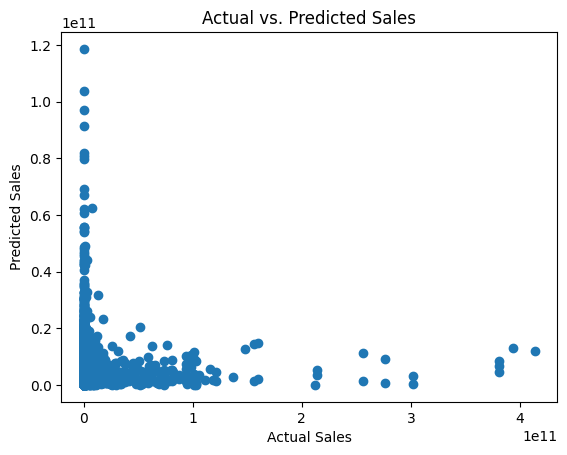

In [82]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(X_train, y_train)


predictions = model.predict(X_test)

# model evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

# visualise results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

We also use KNN to classify the data.

In [83]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

predictions = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.2521120411575845e+20


We also use Logistic Regression to analyse the data.

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Visualise the logistic regression
report_text = f'Classification Report:\n{classification_rep}'

# Parse the classification report text
report_lines = report_text.split('\n')[2:-2]
classes = []
precision = []
recall = []
f1_score = []
support = []

for line in report_lines:
    values = line.split()
    if len(values) == 5:
        classes.append(values[0])
        precision.append(float(values[1]))
        recall.append(float(values[2]))
        f1_score.append(float(values[3]))
        support.append(int(values[4]))

# Create a DataFrame
report_dict = {
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'Support': support
}
report_df = pd.DataFrame(report_dict)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Precision', data=report_df, color='blue', label='Precision')
sns.barplot(x='Class', y='Recall', data=report_df, color='green', label='Recall')
sns.barplot(x='Class', y='F1-Score', data=report_df, color='orange', label='F1-score')

plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=90)
plt.show()


NameError: name 'classification_rep' is not defined

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!